<a href="https://colab.research.google.com/github/achmdwijaya/Deep-learning-YOLO-3-UTS/blob/main/Klasifikasi_Buah_Kelapa_Dan_Semangka_Menggunakan_Convolutional_Neural_Network_(CNN)_Yolo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Penjelasan Metode Yolo3**

YOLOv3, singkatan dari "You Only Look Once" versi 3, adalah algoritma deteksi objek real-time yang sangat populer dan efektif. Dikembangkan oleh Joseph Redmon dan Ali Farhadi, YOLOv3 dikenal karena kecepatannya yang tinggi dalam mendeteksi banyak objek dalam sebuah gambar atau video secara bersamaan, sambil tetap mempertahankan akurasi yang baik. Berbeda dengan metode deteksi objek tradisional yang memisahkan proses proposal wilayah (region proposal) dari klasifikasi dan regresi bounding box (seperti R-CNN dan turunannya), YOLOv3 melakukan ketiga tugas ini dalam satu jaringan saraf konvolusional tunggal. Pendekatan "You Only Look Once" inilah yang memberikannya kecepatan superior.

Inti dari YOLOv3 adalah membagi gambar input menjadi sebuah grid sel. Untuk setiap sel grid, YOLOv3 memprediksi beberapa bounding box (kotak pembatas) dan skor kepercayaan untuk setiap box tersebut. Skor kepercayaan ini mencerminkan seberapa yakin model bahwa box tersebut mengandung objek dan seberapa akurat box tersebut membatasi objek. Selain itu, untuk setiap box yang diprediksi, YOLOv3 juga memprediksi probabilitas kelas objek yang mungkin ada di dalamnya. Jadi, setiap sel grid bertanggung jawab untuk mendeteksi objek yang pusatnya (centroid) jatuh ke dalam sel tersebut.

Arsitektur jaringan saraf konvolusional (CNN) yang digunakan dalam YOLOv3 adalah Darknet-53. Darknet-53 adalah jaringan yang lebih besar dan lebih kuat dibandingkan dengan pendahulunya (Darknet-19 di YOLOv2). Arsitektur ini terdiri dari 53 lapisan konvolusional, sering kali diikuti oleh normalisasi batch dan fungsi aktivasi Leaky ReLU. Peningkatan kedalaman jaringan ini memungkinkan YOLOv3 untuk mempelajari fitur-fitur yang lebih kompleks dari gambar, yang berkontribusi pada peningkatan akurasi deteksinya, terutama untuk objek-objek kecil.

Salah satu fitur kunci dari YOLOv3 yang membedakannya dari versi sebelumnya adalah penggunaan prediksi pada tiga skala yang berbeda. Ini diinspirasi oleh Feature Pyramid Network (FPN). Jaringan Darknet-53 menghasilkan output pada tiga lapisan yang berbeda, yang masing-masing memiliki resolusi spasial yang berbeda. Lapisan-lapisan ini kemudian digunakan untuk memprediksi objek pada skala yang berbeda:

Skala Besar: Lapisan output dengan resolusi spasial terkecil (misalnya, 13x13 untuk input 416x416) digunakan untuk mendeteksi objek-objek besar. Setiap sel grid di sini mencakup area yang luas dari gambar asli.
Skala Menengah: Lapisan output dengan resolusi spasial menengah (misalnya, 26x26) digunakan untuk mendeteksi objek-objek berukuran sedang.
Skala Kecil: Lapisan output dengan resolusi spasial terbesar (misalnya, 52x52) digunakan untuk mendeteksi objek-objek kecil. Setiap sel grid di sini mencakup area yang lebih kecil, memungkinkan deteksi objek kecil yang lebih detail.
Dengan memprediksi pada tiga skala ini, YOLOv3 mampu menangani variasi ukuran objek yang signifikan dalam sebuah gambar, yang merupakan tantangan umum dalam deteksi objek.

Untuk setiap sel grid pada setiap skala, YOLOv3 memprediksi bounding box menggunakan konsep anchor boxes. Anchor boxes adalah sekumpulan kotak pembatas dengan ukuran dan rasio aspek yang telah ditentukan sebelumnya. Model memprediksi offset (pergeseran) dan skala relatif terhadap anchor box ini, serta skor kepercayaan dan probabilitas kelas. Dalam YOLOv3, clustering K-means digunakan pada dataset pelatihan untuk menentukan ukuran dan rasio aspek anchor boxes yang paling representatif. Biasanya, sembilan anchor boxes digunakan secara total, dibagi rata di antara tiga skala (tiga anchor box per skala).

Proses pelatihan YOLOv3 melibatkan optimasi beberapa fungsi kerugian (loss function) secara bersamaan. Fungsi kerugian ini mencakup:

Localization loss: Mengukur seberapa baik bounding box yang diprediksi sesuai dengan ground truth (bounding box sebenarnya). Biasanya menggunakan mean squared error.
Confidence loss: Mengukur seberapa yakin model bahwa sebuah box berisi objek (objectness score). Ini adalah binary cross-entropy loss.
Classification loss: Mengukur seberapa akurat model mengklasifikasikan objek dalam box. Ini menggunakan binary cross-entropy loss untuk setiap kelas secara independen (berbeda dengan Softmax di versi sebelumnya, memungkinkan multi-label classification).
Selama inferensi (saat menggunakan model yang sudah dilatih untuk mendeteksi objek pada gambar baru), YOLOv3 menghasilkan banyak sekali prediksi bounding box (satu set prediksi per sel grid di setiap skala). Banyak dari prediksi ini akan memiliki skor kepercayaan rendah atau tumpang tindih secara signifikan. Untuk mendapatkan hasil deteksi akhir yang bersih, Non-Maximum Suppression (NMS) diterapkan. NMS adalah teknik yang memilih bounding box terbaik dari sekumpulan box yang tumpang tindih berdasarkan skor kepercayaan mereka, dan menekan (menghapus) box-box lain yang tumpang tindih secara signifikan dengan box terbaik tersebut.

Secara keseluruhan, YOLOv3 menawarkan keseimbangan yang sangat baik antara kecepatan dan akurasi, menjadikannya pilihan yang populer untuk berbagai aplikasi deteksi objek real-time, mulai dari pengawasan video hingga sistem mengemudi otonom. Penggunaan arsitektur Darknet-53 yang lebih kuat, prediksi multi-skala, dan penggunaan binary cross-entropy loss untuk klasifikasi adalah beberapa inovasi kunci yang berkontribusi pada performanya yang unggul.

In [1]:
%cd /content
!rm -rf darknet
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet

# 🔹 Install OpenCV dev package agar header dan pkg-config tersedia
!apt-get update
!apt-get install -y libopencv-dev pkg-config


# Edit konfigurasi agar cocok dengan Colab
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile

# Tambahkan flag untuk CUDA 12.x (penting)
!echo "ARCH= -gencode arch=compute_75,code=[sm_75,compute_75] \
-gencode arch=compute_80,code=[sm_80,compute_80] \
-gencode arch=compute_86,code=[sm_86,compute_86] \
-gencode arch=compute_89,code=[sm_89,compute_89]" >> Makefile

# Kompilasi ulang
!make -j$(nproc)


/content
Cloning into 'darknet'...
remote: Enumerating objects: 15909, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15909 (delta 2), reused 2 (delta 2), pack-reused 15903 (from 2)
Receiving objects: 100% (15909/15909), 14.46 MiB | 15.60 MiB/s, done.
Resolving deltas: 100% (10705/10705), done.
/content/darknet
Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,125 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:9 htt

In [1]:
!pip install roboflow

In [26]:
import os
import shutil
import random
import kagglehub
from roboflow import Roboflow

# ===============================================================
# 0️⃣ Unduh dataset kelapa dari Roboflow
# ===============================================================
!rm -rf /content/darknet/coconut-6/
rf = Roboflow(api_key="n8sl2tvyQfvJJgSl3Wxc")
project = rf.workspace("coconutto").project("coconut-3locn")
version = project.version(6)
dataset = version.download("darknet")
coconut_path = dataset.location
print(f"✅ Dataset kelapa dari Roboflow diunduh di: {coconut_path}")

# ===============================================================
# 1️⃣ Buat struktur folder dataset gabungan
# ===============================================================
!rm -rf /content/dataset/
os.makedirs("/content/dataset/train", exist_ok=True)
os.makedirs("/content/dataset/val", exist_ok=True)
os.makedirs("/content/backup", exist_ok=True)

# ===============================================================
# 2️⃣ Fungsi bantu untuk menyalin file YOLO dari folder images & labels
# ===============================================================
def copy_yolo_images_and_labels(images_dir, labels_dir, dst, limit=None):
    os.makedirs(dst, exist_ok=True)
    image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(image_files)

    # hanya potong kalau limit diisi
    if limit is not None:
        image_files = image_files[:limit]

    copied = 0
    for img in image_files:
        base_name = os.path.splitext(img)[0]
        img_path = os.path.join(images_dir, img)
        lbl_path = os.path.join(labels_dir, base_name + ".txt")

        if not os.path.exists(lbl_path):
            continue  # skip gambar tanpa label

        shutil.copy(img_path, dst)
        shutil.copy(lbl_path, dst)
        copied += 1
    return copied

# ===============================================================
# 3️⃣ Salin dataset kelapa dari Roboflow ke folder train
# ===============================================================
MAX_PER_DATASET = 1000
try:
    coconut_images = os.path.join(coconut_path, "train")
    coconut_labels = os.path.join(coconut_path, "train")

    for file_name in os.listdir(coconut_labels):
      if file_name.endswith(".txt"):
          path = os.path.join(coconut_labels, file_name)
          with open(path, "r") as f:
              lines = f.readlines()
          new_lines = []
          for line in lines:
              parts = line.strip().split()
              class_id = int(parts[0])
              if class_id == 2:       # ubah 2 → 0
                  parts[0] = "0"
              new_lines.append(" ".join(parts))
          with open(path, "w") as f:
              f.write("\n".join(new_lines) + "\n")

    copied = copy_yolo_images_and_labels(coconut_images, coconut_labels, "/content/dataset/train", limit=MAX_PER_DATASET)
    print(f"✅ {copied} data kelapa berhasil disalin dari Roboflow.")
except Exception as e:
    print(f"❌ Gagal menyalin dataset kelapa: {e}")

# ===============================================================
# 4️⃣ Unduh dataset semangka dari Kaggle
# ===============================================================
print("\n⬇️ Mengunduh dataset semangka...")
try:
    watermelon_path = kagglehub.dataset_download("quan2003/watermelon-yolov12")
    print(f"✅ Dataset semangka diunduh di: {watermelon_path}")
    copied = copy_yolo_images_and_labels(
        os.path.join(watermelon_path, "train","images"),
        os.path.join(watermelon_path, "train","labels"),
        "/content/dataset/train",
        limit=MAX_PER_DATASET
    )
    print(f"✅ {copied} data semangka berhasil disalin dari Kaggle.")
except Exception as e:
    print(f"❌ Gagal download dataset semangka: {e}")

# ===============================================================
# 5️⃣ Split train → val (80:20)
# ===============================================================
all_images = [f for f in os.listdir("/content/dataset/train") if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random.shuffle(all_images)

split_index = int(0.8 * len(all_images))
val_images = all_images[split_index:]

for img in val_images:
    label_name = os.path.splitext(img)[0] + ".txt"
    src_img = f"/content/dataset/train/{img}"
    src_lbl = f"/content/dataset/train/{label_name}"
    if os.path.exists(src_img):
        shutil.move(src_img, "/content/dataset/val")
    if os.path.exists(src_lbl):
        shutil.move(src_lbl, "/content/dataset/val")

print(f"\n📊 Jumlah data train: {split_index}")
print(f"📊 Jumlah data val: {len(val_images)}")

# ===============================================================
# 6️⃣ Buat file konfigurasi YOLO
# ===============================================================
yolo_cfg_path = "/content/yolo_config"
os.makedirs(yolo_cfg_path, exist_ok=True)

# obj.names
with open(f"{yolo_cfg_path}/obj.names", "w") as f:
    f.write("kelapa\n")
    f.write("semangka\n")

# obj.data
with open(f"{yolo_cfg_path}/obj.data", "w") as f:
    f.write("classes = 2\n")
    f.write(f"train = {yolo_cfg_path}/train.txt\n")
    f.write(f"valid = {yolo_cfg_path}/val.txt\n")
    f.write(f"names = {yolo_cfg_path}/obj.names\n")
    f.write("backup = /content/backup/\n")

# train.txt dan val.txt
train_txt = f"{yolo_cfg_path}/train.txt"
val_txt = f"{yolo_cfg_path}/val.txt"

with open(train_txt, "w") as f:
    for img in os.listdir("/content/dataset/train"):
        if img.lower().endswith(('.jpg', '.jpeg', '.png')):
            f.write(f"/content/dataset/train/{img}\n")

with open(val_txt, "w") as f:
    for img in os.listdir("/content/dataset/val"):
        if img.lower().endswith(('.jpg', '.jpeg', '.png')):
            f.write(f"/content/dataset/val/{img}\n")

print("\n✅ File konfigurasi YOLOv3 dibuat:")
print(f"- {yolo_cfg_path}/obj.names")
print(f"- {yolo_cfg_path}/obj.data")
print(f"- {yolo_cfg_path}/train.txt")
print(f"- {yolo_cfg_path}/val.txt")

# ===============================================================
# 7️⃣ Verifikasi akhir
# ===============================================================
print("\n📂 Struktur dataset:")
print(f"Train: {len(os.listdir('/content/dataset/train'))} file total (gambar + label)")
print(f"Val:   {len(os.listdir('/content/dataset/val'))} file total (gambar + label)")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to coconut-6 in darknet:: 100%|██████████| 6464/6464 [00:01<00:00, 5419.89it/s]


✅ Dataset kelapa dari Roboflow diunduh di: /content/darknet/coconut-6
✅ 1000 data kelapa berhasil disalin dari Roboflow.

⬇️ Mengunduh dataset semangka...
✅ Dataset semangka diunduh di: /root/.cache/kagglehub/datasets/quan2003/watermelon-yolov12/versions/1
✅ 1000 data semangka berhasil disalin dari Kaggle.

📊 Jumlah data train: 1600
📊 Jumlah data val: 400

✅ File konfigurasi YOLOv3 dibuat:
- /content/yolo_config/obj.names
- /content/yolo_config/obj.data
- /content/yolo_config/train.txt
- /content/yolo_config/val.txt

📂 Struktur dataset:
Train: 3200 file total (gambar + label)
Val:   800 file total (gambar + label)


In [3]:
# ===============================================================
# 4️⃣ Unduh file konfigurasi YOLOv3 & ubah untuk 2 kelas
# ===============================================================

# Unduh config asli YOLOv3
!wget -q https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov3.cfg -O /content/darknet/cfg/yolov3_custom.cfg


!grep -A2 "\[yolo\]" /content/darknet/cfg/yolov3_custom.cfg


[yolo]
mask = 6,7,8
anchors = 10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326
--
[yolo]
mask = 3,4,5
anchors = 10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326
--
[yolo]
mask = 0,1,2
anchors = 10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326


In [4]:
# ===============================================================
# 6️⃣ Unduh pretrained weights darknet53
# ===============================================================
!wget https://sourceforge.net/projects/yolov3.mirror/files/v8/darknet53.conv.74


--2025-11-12 06:43:44--  https://sourceforge.net/projects/yolov3.mirror/files/v8/darknet53.conv.74
Resolving sourceforge.net (sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:d95, ...
Connecting to sourceforge.net (sourceforge.net)|104.18.13.149|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/yolov3.mirror/files/v8/darknet53.conv.74/ [following]
--2025-11-12 06:43:45--  https://sourceforge.net/projects/yolov3.mirror/files/v8/darknet53.conv.74/
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/yolov3.mirror/files/v8/darknet53.conv.74/download [following]
--2025-11-12 06:43:45--  https://sourceforge.net/projects/yolov3.mirror/files/v8/darknet53.conv.74/download
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 302 Found
Location: https://downloads.so

In [ ]:
# ===============================================================
# 7️⃣ Training YOLOv3
# ===============================================================
%cd /content/darknet
!./darknet detector train /content/yolo_config/obj.data \
cfg/yolov3_custom.cfg \
/content/darknet53.conv.74\
-dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000166, iou_loss = 0.000000, total_loss = 0.000166 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000153, iou_loss = 0.000000, total_loss = 0.000153 
 total_bbox = 39303, rewritten_bbox = 9.075644 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.472599), count: 4, class_loss = 0.777523, iou_loss = 1.288398, total_loss = 2.065922 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000177, iou_loss = 0.000000, total_loss = 0.000177 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000121, iou_loss = 0.000000, total_loss = 0.000121 
 total_bbox = 39307, rewritten_bbox = 9.074719 % 
v3 (mse

📤 Silakan upload gambar yang ingin diuji (misalnya semangka.jpg)


Saving 001cddbffb428689_jpg.rf.17f34ca5610ece1231d0a7bb2ba0953e.jpg to 001cddbffb428689_jpg.rf.17f34ca5610ece1231d0a7bb2ba0953e (3).jpg
Gambar berhasil diupload: 001cddbffb428689_jpg.rf.17f34ca5610ece1231d0a7bb2ba0953e (3).jpg
 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 co

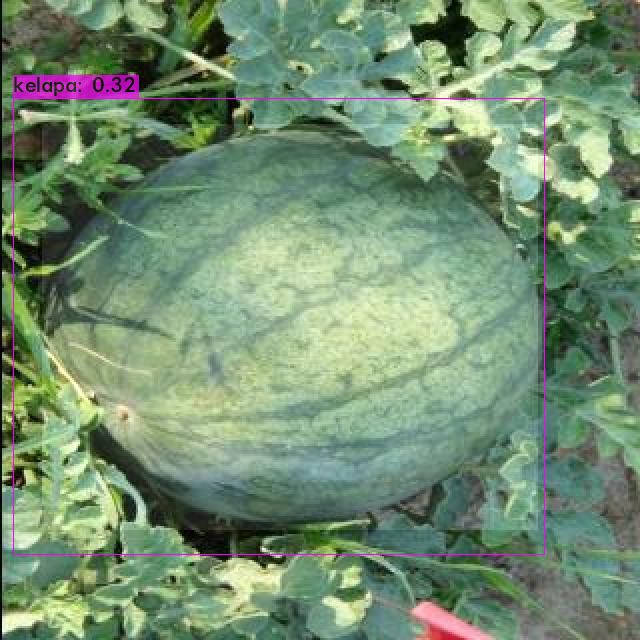


📄 Isi file result.json (hasil koordinat dan confidence):
[
{
 "frame_id":1, 
 "filename":"001cddbffb428689_jpg.rf.17f34ca5610ece1231d0a7bb2ba0953e (3).jpg", 
 "objects": [ 
  {"class_id":0, "name":"kelapa", "relative_coordinates":{"center_x":0.436428, "center_y":0.510578, "width":0.829798, "height":0.712411}, "confidence":0.323562}
 ] 
}
]

In [25]:
# ===============================================================
# 🖼️ Uji Deteksi YOLOv3 Langsung di Colab
# ===============================================================

from google.colab import files
from IPython.display import Image, display
import os

# === 1️⃣ Upload gambar baru untuk diuji ===
print("📤 Silakan upload gambar yang ingin diuji (misalnya semangka.jpg)")
uploaded = files.upload()

# Ambil nama file gambar yang diupload
image_path = list(uploaded.keys())[0]
print(f"Gambar berhasil diupload: {image_path}")

# === 2️⃣ Jalankan YOLO untuk deteksi objek ===
# Pastikan file cfg, data, dan weights sesuai path kamu
!./darknet detector test /content/yolo_config/obj.data cfg/yolov3_custom.cfg /content/backup/yolov3_custom_last.weights "{image_path}" -thresh 0.25 -dont_show -out result.json

# === 3️⃣ Tampilkan hasil deteksi ===
# Hasil deteksi akan disimpan otomatis dengan nama 'predictions.jpg'
if os.path.exists("predictions.jpg"):
    print("\n✅ Hasil deteksi:")
    display(Image(filename='predictions.jpg'))
else:
    print("⚠️ Tidak ditemukan hasil deteksi (predictions.jpg). Periksa log di atas.")


# === 4️⃣ (Opsional) Lihat hasil JSON untuk deteksi detail ===
print("\n📄 Isi file result.json (hasil koordinat dan confidence):")
!cat result.json


